In [16]:
%matplotlib inline
import utils; 
#reload(utils)
from utils import *
from __future__ import division, print_function

In [15]:
path = 'data/glove/'
res_path = path+'results/'

In [ ]:
def get_glove(name):
    with open(path+ 'glove.' + name + '.txt', 'r') as f: lines = [line.split() for line in f]
    words = [d[0] for d in lines]
    vecs = np.stack(np.array(d[1:], dtype=np.float32) for d in lines)
    wordidx = {o:i for i,o in enumerate(words)}
    save_array(res_path+name+'.dat', vecs)
    pickle.dump(words, open(res_path+name+'_words.pkl','wb'))
    pickle.dump(wordidx, open(res_path+name+'_idx.pkl','wb'))

In [ ]:
get_glove('6B.50d')

In [ ]:
get_glove('6B.100d')

In [ ]:
get_glove('6B.200d')

In [ ]:
get_glove('6B.300d')

In [34]:
def load_glove(loc):
    return (load_array(loc+'.dat'), 
            pickle.load(open(loc+'_words.pkl','rb'), encoding='Latin1'), 
            pickle.load(open(loc+'_idx.pkl','rb'), encoding='Latin1'))

In [41]:
vecs, words, wordidx = load_glove(res_path+'6B.100d')
vecs.shape

(400000, 100)

In [36]:
' '.join(words[:25])

'the , . of to and in a " \'s for - that on is was said with he as it by at ( )'

In [37]:
def w2v(w): 
    return vecs[wordidx[w]]

In [42]:
w2v('of')

array([-0.1529, -0.2428,  0.8984,  0.17  ,  0.5352,  0.4878, -0.5883, -0.1798, -1.3581,  0.4254,
        0.1538,  0.2421,  0.1347,  0.4119,  0.6704, -0.5642,  0.4299, -0.0122, -0.1168,  0.3178,
        0.0542, -0.0543,  0.3552, -0.3024,  0.3143, -0.3385,  0.7171, -0.2686, -0.1584, -0.4747,
        0.0516, -0.3325,  0.15  , -0.1299, -0.5462, -0.3784,  0.6426,  0.8219, -0.08  ,  0.0785,
       -0.9698, -0.5774,  0.5649, -0.3987, -0.0571,  0.1974,  0.0657, -0.4809, -0.2013, -0.4083,
        0.3946, -0.0264, -0.1184,  1.012 , -0.5317, -2.7474, -0.043 , -0.7485,  1.7574,  0.5908,
        0.0488,  0.7827,  0.385 ,  0.421 ,  0.6788,  0.1034,  0.6328, -0.0266,  0.5865, -0.4433,
        0.3306, -0.1202, -0.5565,  0.0736,  0.2092,  0.434 , -0.0128,  0.0899, -1.7991,  0.0848,
        0.7711,  0.631 , -0.9068,  0.6033, -1.7515,  0.186 , -0.5069, -0.702 ,  0.6658, -0.813 ,
        0.1871, -0.0185, -0.2676,  0.727 , -0.5936, -0.3484, -0.5609, -0.591 ,  1.0039,  0.2066], dtype=float32)

In [ ]:
reload(sys)
sys.setdefaultencoding('utf8')

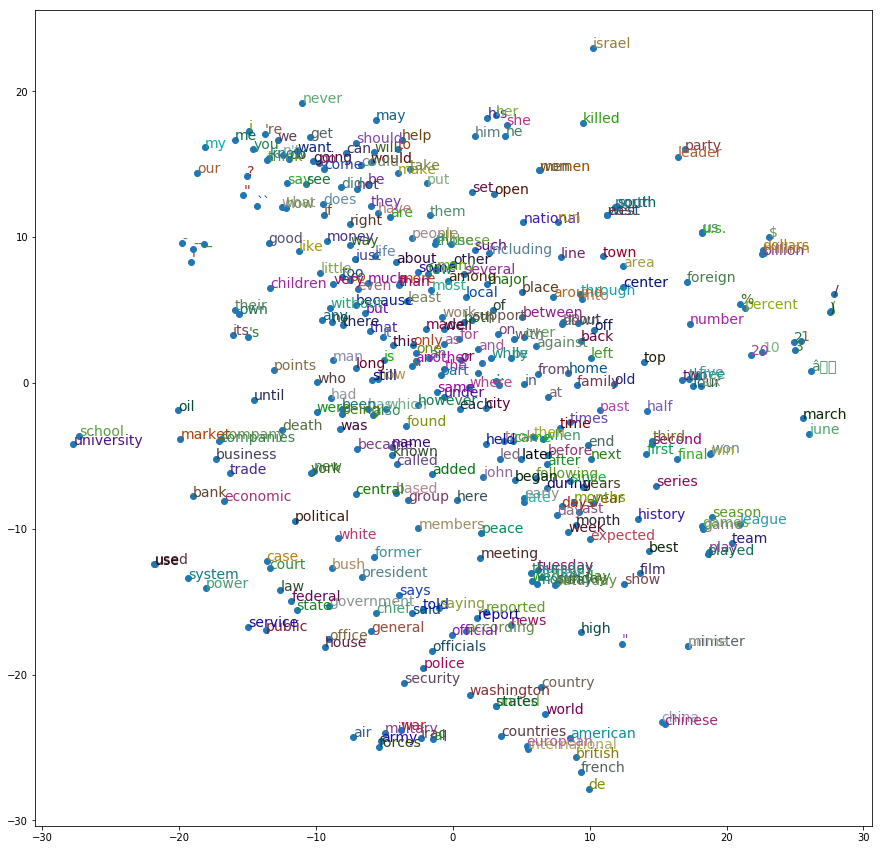

In [43]:
tsne = TSNE(n_components=2, random_state=0)
Y = tsne.fit_transform(vecs[:500])

start=0; end=350
dat = Y[start:end]
plt.figure(figsize=(15,15))
plt.scatter(dat[:, 0], dat[:, 1])
for label, x, y in zip(words[start:end], dat[:, 0], dat[:, 1]):
    plt.text(x,y,label, color=np.random.rand(3)*0.7,
                 fontsize=14)
plt.show()